# Modelagem de tópicos
### corpus: artigos e resumos do ENANCIB 2013

## Bibliotecas utilizadas

In [1]:
import re
from gensim import models, corpora
from nltk import word_tokenize
from nltk.corpus import stopwords

import nltk
from nltk.probability import FreqDist

import csv
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#TRANSFORMAR SIGLAS POPULARES EM PALAVRAS

def conversao_termos(texto):
    texto = re.sub(" museus "," museu ",texto.lower())
    texto = re.sub(" abc "," academia brasileira de ciência ",texto.lower())
    texto = re.sub(" ai "," arquitetura da informação ",texto.lower())
    texto = re.sub(" ala "," american library association ",texto.lower())
    texto = re.sub(" ala "," american library association ",texto.lower())
    texto = re.sub(" american society for information science and Technology "," asist ",texto.lower())
    texto = re.sub(" annual review of information science and technology "," arist ",texto.lower())
    texto = re.sub(" aoi "," arquitetura e organização da informação ",texto.lower())
    texto = re.sub(" associação brasileira de educação em ciência da informação "," abecin ",texto.lower())
    texto = re.sub(" associação brasileira de ensino de biblioteconomia e documentação "," abebd ",texto.lower())
    texto = re.sub(" associação brasileira de normas técnicas "," abnt ",texto.lower())
    texto = re.sub(" associação nacional de pesquisa e pós-graduação em ciência da informação "," ancib ",texto.lower())
    texto = re.sub(" base de dados referencial de artigos de periódicos em ciência da informação "," brapci ",texto.lower())
    texto = re.sub(" bci "," biblioteconomia e ciência da informação ",texto.lower())
    texto = re.sub(" biblioteca digital de teses e dissertações "," bdtd ",texto.lower())
    texto = re.sub(" bn "," biblioteca nacional ",texto.lower())
    texto = re.sub(" bu "," biblioteca universitária ",texto.lower())
    texto = re.sub(" c&t "," ciência e tecnologia ",texto.lower())
    texto = re.sub(" cc "," ciência da computação ",texto.lower())
    texto = re.sub(" ccn "," catálogo coletivo nacional ",texto.lower())
    texto = re.sub(" cdd "," classificação decimal de dewey ",texto.lower())
    texto = re.sub(" cdu "," classificação decimal universal ",texto.lower())
    texto = re.sub(" cdu "," classificação decimal universal ",texto.lower())
    texto = re.sub(" cepe "," conselho de extensão e pesquisa ",texto.lower())
    texto = re.sub(" cepe "," conselho de extensão e pesquisa ",texto.lower())
    texto = re.sub(" ci "," ciência da informação ",texto.lower())
    texto = re.sub(" ci:"," ciência da informação ",texto.lower()) 
    texto = re.sub(" ci,"," ciência da informação ",texto.lower())
    texto = re.sub(" cms "," content management system ",texto.lower())
    texto = re.sub(" cne "," conselho nacional de educação ",texto.lower())
    texto = re.sub(" conselho nacional de desenvolvimento científico e tecnológico "," cnpq ",texto.lower())
    texto = re.sub(" coordenação de aperfeiçoamento de pessoal de nível superior "," capes ",texto.lower())
    texto = re.sub(" coordenação de aperfeiçoamento de pessoal de nível superior "," capes ",texto.lower())
    texto = re.sub(" crm "," customer relationship management ",texto.lower())
    texto = re.sub(" dc "," dublin core ",texto.lower())
    texto = re.sub(" descriptive ontology for linguistic and cognitive engineering "," dolce ",texto.lower())
    texto = re.sub(" ead "," educação à distância ",texto.lower())
    texto = re.sub(" eci "," escola de ciência da informação ",texto.lower())
    texto = re.sub(" enade "," exame nacional de desempenho ",texto.lower())
    texto = re.sub(" encontro nacional de pesquisa em ciência da informação "," enancib ",texto.lower())
    texto = re.sub(" fgv "," Fundação Getúlio Vargas ",texto.lower())
    texto = re.sub(" fiocruz "," fundação oswaldo cruz ",texto.lower())
    texto = re.sub(" ftp "," file transfer protocol ",texto.lower())
    texto = re.sub(" fundação brasileira à pesquisa do estudo de minas gerais "," fapemig ",texto.lower())
    texto = re.sub(" fundação brasileira à pesquisa do estudo de são paulo "," fapesp ",texto.lower())
    texto = re.sub(" fundação brasileira à pesquisa do estudo do rio de janeiro "," faperj ",texto.lower())
    texto = re.sub(" fundação de amparo às pesquisas "," faps ",texto.lower())
    texto = re.sub(" gic "," gestão da informação e conhecimento ",str(texto.lower()))
    texto = re.sub(" gic "," gestão da informação e do conhecimento ",texto.lower())
    texto = re.sub(" gpl "," general public licence ",texto.lower())
    texto = re.sub(" hypertext markup language limguagem "," html ",texto.lower())
    texto = re.sub(" ia "," inteligência artificial ",texto.lower())
    texto = re.sub(" ibpc "," instituto brasileiro do patrimônio cultural ",texto.lower())
    texto = re.sub(" ibpc "," instituto brasileiro do patrimônio cultural ",texto.lower())
    texto = re.sub(" ics "," informação cultura e sociedade ",texto.lower())
    texto = re.sub(" ict "," informação, ciência e tecnologia ",texto.lower())
    texto = re.sub(" idh "," índice de desenvolvimento humano ",texto.lower())
    texto = re.sub(" ies "," instituição de ensino superior ",texto.lower())
    texto = re.sub(" information science and technology abstracts "," ista ",texto.lower())
    texto = re.sub(" instituto brasileiro de bibliografia e documentação "," ibbd ",texto.lower())
    texto = re.sub(" instituto brasileiro de geografia e estatística "," ibge ",texto.lower())
    texto = re.sub(" instituto brasileiro de informação em ciência e tecnologia "," ibict ",texto.lower())
    texto = re.sub(" instituto de ciência da informação "," ici ",texto.lower())
    texto = re.sub(" instituto nacional de estudos e pesquisas educacionais anísio teixeira "," inep ",texto.lower())
    texto = re.sub(" instituto universitário de pesquisa do rio de janeiro "," iuoerj ",texto.lower())
    texto = re.sub(" international federation of library associations and institutions "," ifla ",texto.lower())
    texto = re.sub(" international standard book number "," isbn ",texto.lower())
    texto = re.sub(" international standard serial number "," issn ",texto.lower())
    texto = re.sub(" isi "," institute for scientific information ",texto.lower())
    texto = re.sub(" iso "," international organization for standardization ",texto.lower())
    texto = re.sub(" it "," informação e tecnologia ",texto.lower())
    texto = re.sub(" jcr "," journal citation reports ",texto.lower())
    texto = re.sub(" jstor "," journal storage ",texto.lower())
    texto = re.sub(" kos "," sistemas de organização do conhecimento ",texto.lower())
    texto = re.sub(" lc "," linguagem cinzenta ",texto.lower())
    texto = re.sub(" ld "," linguagem documentária ",texto.lower())
    texto = re.sub(" ldb "," lei de diretrizes e bases ",texto.lower())
    texto = re.sub(" library and informations science abstracts "," lisa ",texto.lower())
    texto = re.sub(" ln "," linguagem natural ",texto.lower())
    texto = re.sub(" lod "," linked open data ",texto.lower())
    texto = re.sub(" marc "," machine readable cataloging ",texto.lower())
    texto = re.sub(" mdi "," multiple document interface ",texto.lower())
    texto = re.sub(" mec "," ministério da educação ",texto.lower())
    texto = re.sub(" npd "," núcleo de pesquisa e documentação ",texto.lower())
    texto = re.sub(" oai "," open archives iniciative ",texto.lower())
    texto = re.sub(" oc "," organização do conhecimento ",texto.lower())
    texto = re.sub(" ocr "," optical character recognition ",texto.lower())
    texto = re.sub(" oi "," organização da informação ",texto.lower())
    texto = re.sub(" ojs "," open journal systems ",texto.lower())
    texto = re.sub(" ong "," organização não-governamental ",texto.lower())
    texto = re.sub(" onu "," organização das nações unidas ",texto.lower())
    texto = re.sub(" organização das nações unidas para a educação e cultura "," unesco ",texto.lower())
    texto = re.sub(" osi "," open society institute ",texto.lower())
    texto = re.sub(" oui "," organização e uso da informação ",texto.lower())
    texto = re.sub(" owl "," web ontology language ",texto.lower())
    texto = re.sub(" pln "," processamento de linguagem natural ",texto.lower())
    texto = re.sub(" plos "," public library of science ",texto.lower())
    texto = re.sub(" poi "," produção e organização da informação ",texto.lower())
    texto = re.sub(" pontifícia universidade católica de minas gerais "," puc mg ",texto.lower())
    texto = re.sub(" pontifícia universidade católica de são paulo "," puc sp ",texto.lower())
    texto = re.sub(" pontifícia universidade católica do rio de janeiro "," puc rj ",texto.lower())
    texto = re.sub(" pontifícia universidade católica do rio grande do sul "," puc rs ",texto.lower())
    texto = re.sub(" ppg "," programa de pós-graduação ",texto.lower())
    texto = re.sub(" programa de pós-graduação em ciência da informação "," ppgci ",texto.lower())
    texto = re.sub(" programa de pós-graduação em ciências sociais "," ppgcs ",texto.lower())
    texto = re.sub(" programa de pós-graduação em sociologia "," ppgs ",texto.lower())
    texto = re.sub(" rc "," representação do conhecimento ",texto.lower())
    texto = re.sub(" rdf "," resource description framework ",texto.lower())
    texto = re.sub(" ri "," recuperação da informação ",texto.lower())
    texto = re.sub(" ri "," recuperação da informação ",texto.lower())
    texto = re.sub(" sad "," sistema de apoio à decisão ",texto.lower())
    texto = re.sub(" sci "," science citation index ",texto.lower())
    texto = re.sub(" scientific electronic library online "," scielo",texto.lower())
    texto = re.sub(" sdr "," zona de desenvolvimento real ",texto.lower())
    texto = re.sub(" serviço central de informação bibliográfica "," scib ",texto.lower())
    texto = re.sub(" serviço nacional de aprendizagem comercial "," senac ",texto.lower())
    texto = re.sub(" serviço nacional de aprendizagem industrial "," senai ",texto.lower())
    texto = re.sub(" serviço social da indústria "," sesi ",texto.lower())
    texto = re.sub(" serviço social do comércio "," sesc ",texto.lower())
    texto = re.sub(" sesi "," serviço social da indústria ",texto.lower())
    texto = re.sub(" sibi "," sistema integrado de bibliotecas ",texto.lower())
    texto = re.sub(" sig "," sistema de informação gerencial ",texto.lower())
    texto = re.sub(" snad "," secretária nacional de políticas anti-drogas ",texto.lower())
    texto = re.sub(" snpq "," sistema nacional de pós-graduação",texto.lower())
    texto = re.sub(" soc "," sistemas de organização do conhecimento ",texto.lower())
    texto = re.sub(" sri "," sistema de recuperação da informação ",texto.lower())
    texto = re.sub(" ssd "," sistema de suporte à decisão ",texto.lower())
    texto = re.sub(" tcc "," trabalho de conclusão de curso ",texto.lower())
    texto = re.sub(" universidade federal de minas gerais "," ufmg ",texto.lower())
    texto = re.sub(" universidade federal de ouro preto "," ufop ",texto.lower())
    texto = re.sub(" universidade federal de pernambuco "," ufpe ",texto.lower())
    texto = re.sub(" universidade federal de santa caratina "," ufsc ",texto.lower())
    texto = re.sub(" universidade federal de são carlos "," ufscar ",texto.lower())
    texto = re.sub(" universidade federal de sergipe "," ufs ",texto.lower())
    texto = re.sub(" universidade federal de viçosa "," ufv ",texto.lower())
    texto = re.sub(" universidade federal do ceará "," ufc ",texto.lower())
    texto = re.sub(" universidade federal do estado do rio de janeiro "," unirio ",texto.lower())
    texto = re.sub(" universidade federal do maranhão "," ufma ",texto.lower())
    texto = re.sub(" universidade federal do pará "," ufpa ",texto.lower())
    texto = re.sub(" universidade federal do paraná "," ufpr ",texto.lower())
    texto = re.sub(" universidade federal do rio de janeiro "," ufrj ",texto.lower())
    texto = re.sub(" universidade federal do rio grande do norte "," ufrn ",texto.lower())
    texto = re.sub(" universidade federal do rio grande do sul  "," ufrgs ",texto.lower())
    texto = re.sub(" universidade federal fluminense "," uff ",texto.lower())
    texto = re.sub(" universidade federal rural do rio de janeiro "," ufrrj ",texto.lower())
    texto = re.sub(" uri "," uniform resource identifier ",texto.lower())
    texto = re.sub(" world wide web consortium "," w3c ",texto.lower())
    texto = re.sub(" xml "," extensible markup language ",texto.lower())
    texto = re.sub(" zpd "," zona de desenvolvimento proximal ",texto.lower())
    texto = re.sub(" citações "," citação ",texto.lower())
    texto = re.sub(" links "," link ",texto.lower())
   #texto = re.sub(" museus "," museu ",texto.lower())
    texto = re.sub("museus","museu",texto.lower())
    texto = re.sub(" literacy "," alfabetização ",texto.lower())  
    texto = re.sub(" bibliotecas "," biblioteca ",texto.lower())
    texto = re.sub(" informações "," informação ",texto.lower())
    texto = re.sub(" information "," informação ",texto.lower())
    texto = re.sub(" bibliographia "," bibliografia ",texto.lower())
    texto = re.sub(" termos "," termo ",texto.lower())
    texto = re.sub(" knowledge "," conhecimento ",texto.lower())  
    texto = re.sub(" accessibility "," acessibilidade ",texto.lower())  
    texto = re.sub(" research "," pesquisa ",texto.lower()) 
    texto = re.sub(" image "," imagem ",texto.lower()) 
    texto = re.sub(" archivists "," arquivistas ",texto.lower()) 
    texto = re.sub("-se", "", texto.lower())
    texto = re.sub(" se ", "", texto.lower())
    texto = re.sub("-lo ", "", texto.lower())
    texto = re.sub("-la ", "", texto.lower())
    texto = re.sub(" lo ", "", texto.lower())
    texto = re.sub(" la ", "", texto.lower())
    texto = re.sub(" los ", "", texto.lower())
    texto = re.sub(" las ", "", texto.lower())
    return texto

In [3]:
#CONFIGURANDO STOP_WORDS

stop_words = set(stopwords.words('portuguese'))
stop_words_us =  set(stopwords.words('english'))
stop_words_us =  set(stopwords.words('spanish'))

#ADICIONAR INSERÇÕES DE PALAVRAS DE PARADA
new_stopwords = ['tais','xviii','jan.',' jul.',' jan ','and','the','acho','lo','pra','é','onde','senão','quanto','outros','sobre','sobretudo','ser','ainda','quais','desse','assim','tal','através','podemos','portanto','pode','tanto','alguns','possível','p.','v','p','-se','se',' se','nesse','nessa','neste','nesta','http','https','disponível','acesso','sendo','marília','rio','dessa','diz','respeito','finais','considerações','desta','belo horizointe','janeiro','fevereiro','março','abril','maio','junho','julho','agosto','setembro','outubro','novembro','dezembro','porto alegre','outro','xix','londrina','paulista','xvii','sentido','maior','bem','ter','deve','devem','entretanto','fazer','todo','tipo','exemplo','pois','apenas','utilizado','utilizados','acordo','casa','figura','cada','tese','acesso','partir','parte','segundo','autor','outras','podem','vez','todos','então','sim','todas','apresenta','algumas','outra','lo','la','-lo','-la','porque','por que','os','etc','jan','fev','mar','abr','mai','jun','jul','ago','set','out','nov','dez','então','aqui','enancib']


stop_words.update(new_stopwords)
stop_words.update(stop_words_us)
new_stopwords_list = set(stop_words)

In [4]:
#SETAR DOCUMENTO A SER LIDO

#CAMINHO DO ARQUIVO
data = []
pasta = "enancib_2013_gts"
caminho="" + pasta

arquivo = open(caminho + ".txt", "r",encoding="utf-8")

In [5]:
#LEITURA DO CORPUS

x=0
for fileid in arquivo:
    document = fileid
    document = conversao_termos(document)

#    document=re.sub(" encontro nacional de pesquisa em ciência da informação "," enancib ",str(document.lower()))
    data.append(document)

NO_DOCUMENTS = len(data)
print(NO_DOCUMENTS)

303


In [6]:
#RESULTADO PARA VERIFICAÇÃO DE CONVERSÃO DE SIGLAS E LEITURA DE TEXTO CONTIDO NO CORPUS

print(data[1])

['xiv enancib (enancib 2013) gt 1: estudos históricos e epistemológicos da ciência da informação  comunicação oral  o conceito de informação pelo viés da alteridade  jonathas luiz carvalho silva – ufca/ufba henriette ferreira gomes – ufba  resumo aborda relações sobre informação e alteridade. apresenta como síntese do problema a seguinte pergunta: comodão as relações teórico-epistemológicas entre informação e alteridade? como objetivo geral busca analisar o conceito de informação sob a ótica da alteridade na perspectiva triádica da negação, diferença e afirmação, considerando diálogos no âmbito da filosofia moderna e contemporânea. já como objetivos específicos busca: discutir alteridade sob as reflexões de hegel, sartre e lévinas; e analisar algumas relações entre informação e alteridade no âmbito da negação, diferença e afirmação alteritárias da informação. a metodologia do trabalhoconstitui de uma pesquisa de nível exploratório com um delineamento bibliográfico. conclui que a inform

In [7]:
#FUNÇÃO BIGRAMA E TRIGRAMA

def bigramas(words):
 
    bigrams = []
 
    for i in range(0, len(words)):
        if (i == len(words)-1):
            break
        else:
            bigrama_obs = words[i] + '_' + words[i+1]
            bigrams.append(bigrama_obs)
 
    return bigrams

def trigramas(words):
 
    trigrams = []
 
    for i in range(0, len(words)):
        if (i == len(words)-2):
            break
        else:
            trigrama_obs = words[i] + '_' + words[i+1] + '_' + words[i+2]
            trigrams.append(trigrama_obs)
 
    return trigrams

In [8]:
# TOKENIZAR O DOCUMENTO E FAZER A STOPWORDS

def clean_text(text):
    tokenized_text = word_tokenize(text.lower())
    cleaned_text = [t for t in tokenized_text if t not in stop_words and re.match('[a-zA-Z\-][a-zA-Z\-]{2,}', t)]
    return cleaned_text
 
tokenized_data = []
texto2 = []
total_unigramas = []
total_bigramas = []
total_trigramas = []

for text in data:
    xtexto = clean_text(text)

#CRIAR O UNIGRAMA, BIGRAMAS, TRIGRAMAS
    unigramas = xtexto
    xbigramas = bigramas(xtexto)
    xtrigramas = trigramas(xtexto)
    xunigramas = unigramas + xbigramas + xtrigramas
    
    tokenized_data.append(xunigramas)
    texto2 = texto2 + xunigramas

#CRIAR OPÇÃO PARA MOSTRAR A FREQUENCIA SOMENTE DE UNIGRAMA , BIGRAMAS E TRIGRAMAS
    total_unigramas = total_unigramas + unigramas
    total_bigramas = total_bigramas + xbigramas
    total_trigramas = total_trigramas + xtrigramas
    
xfrequencia = texto2

In [9]:
#TOTAL DE UNIGRAMAS, BIGRAMAS E TRIGRAMAS
print("Total de Unigramas: "+ str((len(total_unigramas))))
print("Total de Bigramas: "+ str((len(total_bigramas))))
print("Total de Trigramas: "+ str((len(total_trigramas))))

Total de Unigramas: 800270
Total de Bigramas: 799967
Total de Trigramas: 799664


In [10]:
#CELULA EXTRA - VERIFICAR TEXTO TOKENIZADO com n-gramas
print(tokenized_data[1])

['estudos', 'históricos', 'epistemológicos', 'informação', 'comunicação', 'oral', 'conceito', 'informação', 'alteridade', 'jonathas', 'luiz', 'carvalho', 'silva', 'ufca/ufba', 'henriette', 'ferreira', 'gomes', 'ufba', 'resumo', 'aborda', 'relações', 'informação', 'alteridade', 'problema', 'seguinte', 'pergunta', 'comodão', 'relações', 'informação', 'alteridade', 'objetivo', 'geral', 'busca', 'analisar', 'conceito', 'informação', 'sob', 'alteridade', 'perspectiva', 'triádica', 'negação', 'diferença', 'afirmação', 'considerando', 'filosofia', 'moderna', 'contemporânea', 'objetivos', 'específicos', 'busca', 'discutir', 'alteridade', 'sob', 'reflexões', 'hegel', 'sartre', 'analisar', 'relações', 'informação', 'alteridade', 'negação', 'diferença', 'afirmação', 'alteritárias', 'informação', 'metodologia', 'trabalhoconstitui', 'pesquisa', 'exploratório', 'delineamento', 'bibliográfico', 'conclui', 'informação', 'elemento', 'eminentemente', 'alteritário', 'efetiva', 'necessidade', 'ampliação',

# CRIANDO A FREQUÊNCIA

In [11]:
#MOSTRA A FREQUENCIA EM ORDEM - FREQUENCIA GERAL
num_freq = 1000
fdist = FreqDist(xfrequencia)
fdist.pprint(num_freq)
xfreq = fdist
nome_arquivo = "freq_geral_artigosresumos_enancib_2013_gts"

#GUARDA EM UM CSV A FREQUENCIA GERAL 
import csv
# GUARDA O CORPUS EM UM CSV SEPARADO POR TABULAÇÃO
with open(nome_arquivo + ".csv", "w", newline='') as fp:
    writer = csv.writer(fp,delimiter = ',')
    writer.writerows(fdist.most_common(num_freq))

#MOSTRA AS FREQUÊNCIAS POR LINHA
print("\n  PALAVRA -- FREQUÊNCIA")
fdist.most_common(num_freq)

FreqDist({'informação': 17936, 'pesquisa': 4982, 'conhecimento': 4272, 'dados': 2896, 'forma': 2556, 'social': 2413, 'processo': 2348, 'museu': 2039, 'comunicação': 2014, 'uso': 2002, 'organização': 1923, 'biblioteca': 1922, 'documentos': 1909, 'relação': 1801, 'produção': 1775, 'trabalho': 1768, 'sociais': 1765, 'memória': 1715, 'estudo': 1694, 'sociedade': 1642, 'brasil': 1619, 'sistema': 1584, 'desenvolvimento': 1540, 'estudos': 1536, 'contexto': 1525, 'gestão': 1504, 'usuários': 1494, 'meio': 1453, 'web': 1446, 'termo': 1443, 'científica': 1439, 'campo': 1425, 'busca': 1377, 'tecnologia': 1360, 'paulo': 1326, 'instituições': 1297, 'modelo': 1278, 'relações': 1273, 'rede': 1233, 'construção': 1232, 'autores': 1208, 'tempo': 1203, 'diferentes': 1200, 'base': 1191, 'nacional': 1146, 'representação': 1134, 'digital': 1131, 'educação': 1128, 'informacional': 1111, 'sistemas': 1098, 'cultura': 1097, 'processos': 1095, 'atividades': 1088, 'fonte': 1086, 'resultados': 1071, 'objeto': 1055,

[('informação', 17936),
 ('pesquisa', 4982),
 ('conhecimento', 4272),
 ('dados', 2896),
 ('forma', 2556),
 ('social', 2413),
 ('processo', 2348),
 ('museu', 2039),
 ('comunicação', 2014),
 ('uso', 2002),
 ('organização', 1923),
 ('biblioteca', 1922),
 ('documentos', 1909),
 ('relação', 1801),
 ('produção', 1775),
 ('trabalho', 1768),
 ('sociais', 1765),
 ('memória', 1715),
 ('estudo', 1694),
 ('sociedade', 1642),
 ('brasil', 1619),
 ('sistema', 1584),
 ('desenvolvimento', 1540),
 ('estudos', 1536),
 ('contexto', 1525),
 ('gestão', 1504),
 ('usuários', 1494),
 ('meio', 1453),
 ('web', 1446),
 ('termo', 1443),
 ('científica', 1439),
 ('campo', 1425),
 ('busca', 1377),
 ('tecnologia', 1360),
 ('paulo', 1326),
 ('instituições', 1297),
 ('modelo', 1278),
 ('relações', 1273),
 ('rede', 1233),
 ('construção', 1232),
 ('autores', 1208),
 ('tempo', 1203),
 ('diferentes', 1200),
 ('base', 1191),
 ('nacional', 1146),
 ('representação', 1134),
 ('digital', 1131),
 ('educação', 1128),
 ('informacio

In [12]:
#MOSTRA A FREQUENCIA EM ORDEM - FREQUENCIA UNIGRAMA
num_freq = 1000
fdist = FreqDist(total_unigramas)
fdist.pprint(num_freq)
xfreq = fdist
nome_arquivo = "freq_unigrama_artigosresumos_enancib_2013_gts"

#GUARDA EM UM CSV A FREQUENCIA GERAL 
import csv
# GUARDA O CORPUS EM UM CSV SEPARADO POR TABULAÇÃO
with open(nome_arquivo + ".csv", "w", newline='') as fp:
    writer = csv.writer(fp,delimiter = ',')
    writer.writerows(fdist.most_common(num_freq))

#MOSTRA AS FREQUÊNCIAS POR LINHA
print("\n  PALAVRA -- FREQUÊNCIA")
fdist.most_common(num_freq)

FreqDist({'informação': 17936, 'pesquisa': 4982, 'conhecimento': 4272, 'dados': 2896, 'forma': 2556, 'social': 2413, 'processo': 2348, 'museu': 2039, 'comunicação': 2014, 'uso': 2002, 'organização': 1923, 'biblioteca': 1922, 'documentos': 1909, 'relação': 1801, 'produção': 1775, 'trabalho': 1768, 'sociais': 1765, 'memória': 1715, 'estudo': 1694, 'sociedade': 1642, 'brasil': 1619, 'sistema': 1584, 'desenvolvimento': 1540, 'estudos': 1536, 'contexto': 1525, 'gestão': 1504, 'usuários': 1494, 'meio': 1453, 'web': 1446, 'termo': 1443, 'científica': 1439, 'campo': 1425, 'busca': 1377, 'tecnologia': 1360, 'paulo': 1326, 'instituições': 1297, 'modelo': 1278, 'relações': 1273, 'rede': 1233, 'construção': 1232, 'autores': 1208, 'tempo': 1203, 'diferentes': 1200, 'base': 1191, 'nacional': 1146, 'representação': 1134, 'digital': 1131, 'educação': 1128, 'informacional': 1111, 'sistemas': 1098, 'cultura': 1097, 'processos': 1095, 'atividades': 1088, 'fonte': 1086, 'resultados': 1071, 'objeto': 1055,

[('informação', 17936),
 ('pesquisa', 4982),
 ('conhecimento', 4272),
 ('dados', 2896),
 ('forma', 2556),
 ('social', 2413),
 ('processo', 2348),
 ('museu', 2039),
 ('comunicação', 2014),
 ('uso', 2002),
 ('organização', 1923),
 ('biblioteca', 1922),
 ('documentos', 1909),
 ('relação', 1801),
 ('produção', 1775),
 ('trabalho', 1768),
 ('sociais', 1765),
 ('memória', 1715),
 ('estudo', 1694),
 ('sociedade', 1642),
 ('brasil', 1619),
 ('sistema', 1584),
 ('desenvolvimento', 1540),
 ('estudos', 1536),
 ('contexto', 1525),
 ('gestão', 1504),
 ('usuários', 1494),
 ('meio', 1453),
 ('web', 1446),
 ('termo', 1443),
 ('científica', 1439),
 ('campo', 1425),
 ('busca', 1377),
 ('tecnologia', 1360),
 ('paulo', 1326),
 ('instituições', 1297),
 ('modelo', 1278),
 ('relações', 1273),
 ('rede', 1233),
 ('construção', 1232),
 ('autores', 1208),
 ('tempo', 1203),
 ('diferentes', 1200),
 ('base', 1191),
 ('nacional', 1146),
 ('representação', 1134),
 ('digital', 1131),
 ('educação', 1128),
 ('informacio

In [13]:
#MOSTRA A FREQUENCIA EM ORDEM - FREQUENCIA BIGRAMA
num_freq = 1000
fdist = FreqDist(total_bigramas)
fdist.pprint(num_freq)
xfreq = fdist
nome_arquivo = "freq_bigrama_artigosresumos_enancib_2013_gts"

#GUARDA EM UM CSV A FREQUENCIA GERAL 
import csv
# GUARDA O CORPUS EM UM CSV SEPARADO POR TABULAÇÃO
with open(nome_arquivo + ".csv", "w", newline='') as fp:
    writer = csv.writer(fp,delimiter = ',')
    writer.writerows(fdist.most_common(num_freq))

#MOSTRA AS FREQUÊNCIAS POR LINHA
print("\n  PALAVRA -- FREQUÊNCIA")
fdist.most_common(num_freq)

FreqDist({'informação_science': 530, 'informação_tecnologia': 496, 'recuperação_informação': 431, 'redes_sociais': 427, 'informação_conhecimento': 418, 'informação_comunicação': 393, 'gestão_informação': 377, 'produção_científica': 368, 'universidade_federal': 364, 'uso_informação': 316, 'organização_informação': 288, 'fontes_informação': 270, 'organização_conhecimento': 255, 'belo_horizonte': 247, 'tomada_decisão': 242, 'tecnologias_informação': 234, 'dados_pesquisa': 225, 'comunicação_oral': 219, 'sistemas_informação': 216, 'informação_informação': 211, 'coleta_dados': 209, 'ponto_vista': 207, 'conhecimento_científico': 205, 'base_dados': 202, 'gestão_conhecimento': 201, 'bases_dados': 199, 'ensino_superior': 193, 'informação_brasília': 193, 'competência_informacional': 191, 'pesquisa_informação': 188, 'dissertação_mestrado': 186, 'biblioteca_universitárias': 180, 'objeto_estudo': 175, 'comunicação_científica': 174, 'web_semântica': 169, 'arquitetura_informação': 167, 'patrimônio_cul

[('informação_science', 530),
 ('informação_tecnologia', 496),
 ('recuperação_informação', 431),
 ('redes_sociais', 427),
 ('informação_conhecimento', 418),
 ('informação_comunicação', 393),
 ('gestão_informação', 377),
 ('produção_científica', 368),
 ('universidade_federal', 364),
 ('uso_informação', 316),
 ('organização_informação', 288),
 ('fontes_informação', 270),
 ('organização_conhecimento', 255),
 ('belo_horizonte', 247),
 ('tomada_decisão', 242),
 ('tecnologias_informação', 234),
 ('dados_pesquisa', 225),
 ('comunicação_oral', 219),
 ('sistemas_informação', 216),
 ('informação_informação', 211),
 ('coleta_dados', 209),
 ('ponto_vista', 207),
 ('conhecimento_científico', 205),
 ('base_dados', 202),
 ('gestão_conhecimento', 201),
 ('bases_dados', 199),
 ('ensino_superior', 193),
 ('informação_brasília', 193),
 ('competência_informacional', 191),
 ('pesquisa_informação', 188),
 ('dissertação_mestrado', 186),
 ('biblioteca_universitárias', 180),
 ('objeto_estudo', 175),
 ('comunic

In [14]:
#MOSTRA A FREQUENCIA EM ORDEM - FREQUENCIA TRIGRAMA
num_freq = 1000
fdist = FreqDist(total_trigramas)
fdist.pprint(num_freq)
xfreq = fdist
nome_arquivo = "freq_trigrama_artigosresumos_enancib_2013_gts"

#GUARDA EM UM CSV A FREQUENCIA GERAL 
import csv
# GUARDA O CORPUS EM UM CSV SEPARADO POR TABULAÇÃO
with open(nome_arquivo + ".csv", "w", newline='') as fp:
    writer = csv.writer(fp,delimiter = ',')
    writer.writerows(fdist.most_common(num_freq))

#MOSTRA AS FREQUÊNCIAS POR LINHA
print("\n  PALAVRA -- FREQUÊNCIA")
fdist.most_common(num_freq)

FreqDist({'tecnologias_informação_comunicação': 145, 'fonte_dados_pesquisa': 125, 'resource_description_framework': 119, 'informação_comunicação_oral': 107, 'gestão_informação_conhecimento': 106, 'society_informação_science': 97, 'fundação_oswaldo_cruz': 94, 'american_society_informação': 93, 'journal_american_society': 90, 'organização_representação_conhecimento': 85, 'nacional_pesquisa_informação': 84, 'encontro_nacional_pesquisa': 82, 'dissertação_mestrado_informação': 82, 'portal_periódicos_capes': 80, 'informação_science_technology': 74, 'informação_belo_horizonte': 66, 'instituição_ensino_superior': 60, 'instituições_ensino_superior': 56, 'busca_uso_informação': 56, 'informação_universidade_federal': 54, 'informação_tecnologia_was': 53, 'modelo_conceitual_frbr': 52, 'machine_readable_cataloging': 52, 'universidade_federal_paraíba': 48, 'extensible_markup_language': 47, 'sistema_recuperação_informação': 46, 'produção_comunicação_informação': 46, 'sistemas_organização_conhecimento'

[('tecnologias_informação_comunicação', 145),
 ('fonte_dados_pesquisa', 125),
 ('resource_description_framework', 119),
 ('informação_comunicação_oral', 107),
 ('gestão_informação_conhecimento', 106),
 ('society_informação_science', 97),
 ('fundação_oswaldo_cruz', 94),
 ('american_society_informação', 93),
 ('journal_american_society', 90),
 ('organização_representação_conhecimento', 85),
 ('nacional_pesquisa_informação', 84),
 ('encontro_nacional_pesquisa', 82),
 ('dissertação_mestrado_informação', 82),
 ('portal_periódicos_capes', 80),
 ('informação_science_technology', 74),
 ('informação_belo_horizonte', 66),
 ('instituição_ensino_superior', 60),
 ('instituições_ensino_superior', 56),
 ('busca_uso_informação', 56),
 ('informação_universidade_federal', 54),
 ('informação_tecnologia_was', 53),
 ('modelo_conceitual_frbr', 52),
 ('machine_readable_cataloging', 52),
 ('universidade_federal_paraíba', 48),
 ('extensible_markup_language', 47),
 ('sistema_recuperação_informação', 46),
 ('pro

## Gráfico

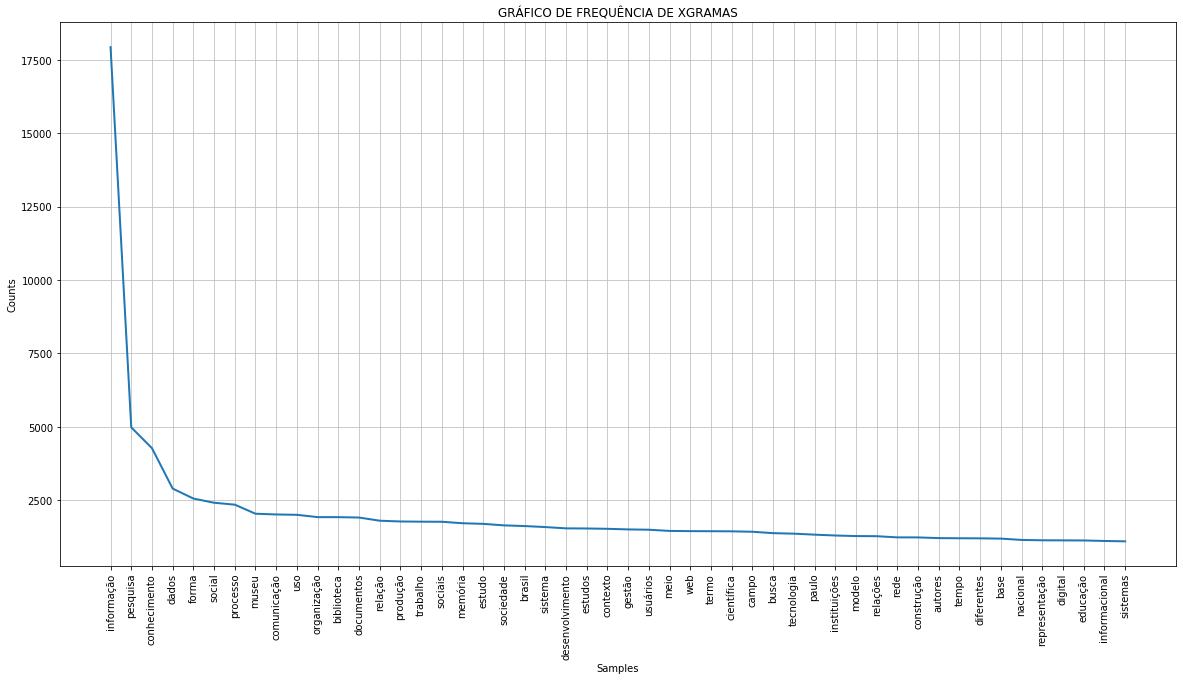

In [15]:
# MOSTRAR O GRÁFICO 

num_freq = 50
#fdist.figure(figsize=(30, 20))
arquivo_grafico = xfrequencia #mudar a variável para representações xgramas v1: total_unigramas v2: total_bigramas v3: total_trigramas v4: xfrequencia
fdist = FreqDist(arquivo_grafico)

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(20,10)) 
fdist.plot(num_freq,cumulative=False,title='GRÁFICO DE FREQUÊNCIA DE XGRAMAS')

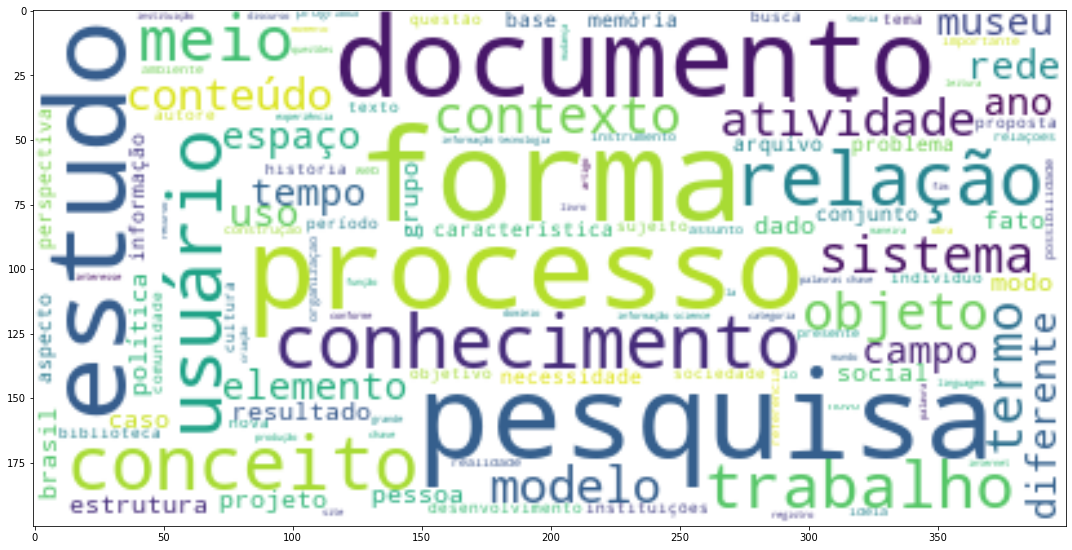

In [16]:
#NUVEM DE PALAVRAS

from wordcloud import WordCloud
cleaned =  ' '.join(xfrequencia)
num_freq = 250
wordcloud = WordCloud(max_font_size=50, max_words=num_freq, background_color="white").generate(cleaned)
fig, ax = plt.subplots(figsize=(15, 20))
ax.imshow(wordcloud, interpolation='nearest')
plt.imshow(wordcloud, interpolation="bilinear")
plt.tight_layout()
plt.savefig("artigosresumos_nuv_enancib_2013_gts.png", format = "png")

# CRIANDO O DICIONÁRIO E O CORPUS

In [17]:
#CRIAR DICIONÁRIO 
dictionary = corpora.Dictionary(tokenized_data)
 
#TRANSFORMAR A COLEÇÃO TEXTO COM ID
corpus = [dictionary.doc2bow(text) for text in tokenized_data]

## Latent Dirichlet Allocation (LDA)

### Modelo LDA - 10 tópicos

In [18]:
print("=========================================== Modelo LDA: 10 TÓPICOS ==================================================\n")
num_topics = 10

chunksize = 1000
passes = 40
iterations = 600
eval_every = None  # Don't evaluate model perplexity, takes too much time.
%time model = models.LdaModel(corpus=corpus, id2word=dictionary, chunksize=chunksize, \
                       alpha='auto', eta='auto', \
                       iterations=iterations, num_topics=num_topics, \
                       passes=passes, eval_every=eval_every)

for idx in range(num_topics):
    print("Tópico %s: " % idx, model.print_topic(idx, 10))

=========================================== Modelo LDA: 10 TÓPICOS ==================================================

Wall time: 2min 52s
Tópico 0:  0.002*"informação" + 0.002*"web" + 0.001*"dados" + 0.001*"periódicos" + 0.001*"nacional" + 0.001*"pesquisa" + 0.001*"museu" + 0.000*"objeto" + 0.000*"instituições" + 0.000*"memória"
Tópico 1:  0.003*"informação" + 0.001*"processo" + 0.001*"dados" + 0.001*"trabalho" + 0.001*"digital" + 0.001*"conhecimento" + 0.001*"forma" + 0.001*"sociedade" + 0.001*"pesquisa" + 0.001*"arte"
Tópico 2:  0.010*"informação" + 0.002*"pesquisa" + 0.002*"conhecimento" + 0.001*"gestão" + 0.001*"usuários" + 0.001*"uso" + 0.001*"forma" + 0.001*"estudos" + 0.001*"biblioteca" + 0.001*"organização"
Tópico 3:  0.006*"informação" + 0.002*"museu" + 0.001*"pesquisa" + 0.001*"social" + 0.001*"conhecimento" + 0.001*"sociedade" + 0.001*"trabalho" + 0.001*"processo" + 0.001*"forma" + 0.001*"dados"
Tópico 4:  0.001*"memória" + 0.001*"relações" + 0.001*"ontologias" + 0.001*"cie

### Modelo LDA - 14 tópicos

In [19]:
print("=========================================== Modelo LDA: 14 TÓPICOS ==================================================\n")
num_topics = 14
chunksize = 1000
passes = 40
iterations = 600
eval_every = None  # Don't evaluate model perplexity, takes too much time.
%time model = models.LdaModel(corpus=corpus, id2word=dictionary, chunksize=chunksize, \
                       alpha='auto', eta='auto', \
                       iterations=iterations, num_topics=num_topics, \
                       passes=passes, eval_every=eval_every)

for idx in range(num_topics):
    print("Tópico %s: " % idx, model.print_topic(idx, 10))

=========================================== Modelo LDA: 14 TÓPICOS ==================================================

Wall time: 3min 30s
Tópico 0:  0.008*"informação" + 0.003*"pesquisa" + 0.002*"conhecimento" + 0.001*"dados" + 0.001*"organização" + 0.001*"biblioteca" + 0.001*"uso" + 0.001*"científica" + 0.001*"forma" + 0.001*"processo"
Tópico 1:  0.002*"museu" + 0.002*"informação" + 0.001*"tempo" + 0.001*"universidades" + 0.001*"instituições" + 0.001*"rede" + 0.001*"pesquisa" + 0.001*"conhecimento" + 0.001*"objetos" + 0.001*"educação"
Tópico 2:  0.003*"informação" + 0.002*"sociais" + 0.001*"rede" + 0.001*"documentos" + 0.001*"redes" + 0.001*"social" + 0.001*"memória" + 0.001*"comunicação" + 0.001*"forma" + 0.001*"leitura"
Tópico 3:  0.008*"informação" + 0.001*"pesquisa" + 0.001*"social" + 0.001*"conhecimento" + 0.001*"biblioteca" + 0.001*"forma" + 0.001*"comunicação" + 0.001*"processo" + 0.001*"organização" + 0.001*"sociais"
Tópico 4:  0.001*"curso" + 0.001*"evasão" + 0.000*"bibliote

### Modelo LDA - 18 tópicos

In [20]:
print("=========================================== Modelo LDA: 18 TÓPICOS ==================================================\n")
num_topics = 18
chunksize = 1000
passes = 40
iterations = 600
eval_every = None  # Don't evaluate model perplexity, takes too much time.
%time model = models.LdaModel(corpus=corpus, id2word=dictionary, chunksize=chunksize, \
                       alpha='auto', eta='auto', \
                       iterations=iterations, num_topics=num_topics, \
                       passes=passes, eval_every=eval_every)

for idx in range(num_topics):
    print("Tópico %s: " % idx, model.print_topic(idx, 10))

=========================================== Modelo LDA: 18 TÓPICOS ==================================================

Wall time: 4min 15s
Tópico 0:  0.002*"informação" + 0.002*"documentos" + 0.001*"classificação" + 0.001*"lei" + 0.001*"arquivos" + 0.001*"federal" + 0.001*"artigo" + 0.001*"interoperabilidade" + 0.001*"arquivo" + 0.001*"forma"
Tópico 1:  0.004*"museu" + 0.003*"informação" + 0.001*"relações" + 0.001*"conhecimento" + 0.001*"dados" + 0.001*"ontologias" + 0.001*"linguagem" + 0.001*"pesquisa" + 0.001*"construção" + 0.001*"organização"
Tópico 2:  0.003*"informação" + 0.001*"pesquisa" + 0.001*"contexto" + 0.001*"curso" + 0.001*"arte" + 0.001*"produção" + 0.001*"dados" + 0.001*"social" + 0.001*"científica" + 0.001*"evasão"
Tópico 3:  0.007*"informação" + 0.002*"pesquisa" + 0.002*"dados" + 0.002*"conhecimento" + 0.002*"biblioteca" + 0.001*"web" + 0.001*"usuários" + 0.001*"sociais" + 0.001*"comunicação" + 0.001*"forma"
Tópico 4:  0.002*"informação" + 0.001*"biblioteconomia" + 0.0

### Modelo LDA - 22 tópicos

In [21]:
print("=========================================== Modelo LDA: 22 TÓPICOS ==================================================\n")
num_topics = 22
chunksize = 1000
passes = 40
iterations = 600
eval_every = None  # Don't evaluate model perplexity, takes too much time.
%time model = models.LdaModel(corpus=corpus, id2word=dictionary, chunksize=chunksize, \
                       alpha='auto', eta='auto', \
                       iterations=iterations, num_topics=num_topics, \
                       passes=passes, eval_every=eval_every)

for idx in range(num_topics):
    print("Tópico %s: " % idx, model.print_topic(idx, 10))

=========================================== Modelo LDA: 22 TÓPICOS ==================================================

Wall time: 5min 4s
Tópico 0:  0.003*"informação" + 0.001*"atores" + 0.001*"rede" + 0.001*"pesquisa" + 0.001*"documentos" + 0.001*"redes" + 0.001*"conhecimento" + 0.001*"entidades" + 0.001*"campo" + 0.001*"gestão"
Tópico 1:  0.004*"informação" + 0.001*"sociais" + 0.001*"redes" + 0.001*"digital" + 0.001*"redes_sociais" + 0.001*"preservação" + 0.001*"verdade" + 0.001*"social" + 0.001*"rede" + 0.001*"museu"
Tópico 2:  0.005*"informação" + 0.003*"pesquisa" + 0.001*"conhecimento" + 0.001*"dados" + 0.001*"social" + 0.001*"científica" + 0.001*"biblioteca" + 0.001*"termo" + 0.001*"forma" + 0.001*"comunicação"
Tópico 3:  0.008*"informação" + 0.002*"pesquisa" + 0.001*"biblioteconomia" + 0.001*"conhecimento" + 0.001*"biblioteca" + 0.001*"dados" + 0.001*"social" + 0.001*"usuários" + 0.001*"uso" + 0.001*"periódicos"
Tópico 4:  0.004*"informação" + 0.001*"dados" + 0.001*"decisão" + 0

### Modelo LDA - 26 tópicos

In [22]:
print("=========================================== Modelo LDA: 26 TÓPICOS ==================================================\n")
num_topics = 26
chunksize = 1000
passes = 40
iterations = 600
eval_every = None  # Don't evaluate model perplexity, takes too much time.
%time model = models.LdaModel(corpus=corpus, id2word=dictionary, chunksize=chunksize, \
                       alpha='auto', eta='auto', \
                       iterations=iterations, num_topics=num_topics, \
                       passes=passes, eval_every=eval_every)

for idx in range(num_topics):
    print("Tópico %s: " % idx, model.print_topic(idx, 10))

=========================================== Modelo LDA: 26 TÓPICOS ==================================================

Wall time: 6min 3s
Tópico 0:  0.005*"informação" + 0.002*"sociais" + 0.001*"social" + 0.001*"redes" + 0.001*"rede" + 0.001*"comunicação" + 0.001*"redes_sociais" + 0.001*"brasil" + 0.001*"nacional" + 0.001*"pesquisa"
Tópico 1:  0.001*"museu" + 0.001*"objetos" + 0.001*"exposição" + 0.001*"material" + 0.001*"objeto" + 0.001*"cultura" + 0.001*"coisas" + 0.001*"república" + 0.000*"pesquisa" + 0.000*"pessoas"
Tópico 2:  0.007*"informação" + 0.003*"biblioteca" + 0.002*"marketing" + 0.001*"livro" + 0.001*"sistema" + 0.001*"pesquisa" + 0.001*"termo" + 0.001*"forma" + 0.001*"informacional" + 0.001*"trabalho"
Tópico 3:  0.002*"memória" + 0.001*"crecimiento" + 0.001*"documentos" + 0.001*"programa" + 0.001*"brasil" + 0.001*"colégio" + 0.001*"identidade" + 0.001*"ufes" + 0.001*"forma" + 0.001*"literatura"
Tópico 4:  0.003*"informação" + 0.002*"conhecimento" + 0.002*"museu" + 0.001*"

### Modelo LDA - 30 tópicos

In [23]:
print("=========================================== Modelo LDA: 30 TÓPICOS ==================================================\n")
num_topics = 30

chunksize = 1000
passes = 40
iterations = 600
eval_every = None  # Don't evaluate model perplexity, takes too much time.
%time model = models.LdaModel(corpus=corpus, id2word=dictionary, chunksize=chunksize, \
                       alpha='auto', eta='auto', \
                       iterations=iterations, num_topics=num_topics, \
                       passes=passes, eval_every=eval_every)

for idx in range(num_topics):
    print("Tópico %s: " % idx, model.print_topic(idx, 10))

=========================================== Modelo LDA: 30 TÓPICOS ==================================================

Wall time: 6min 39s
Tópico 0:  0.000*"informação" + 0.000*"museu" + 0.000*"memória" + 0.000*"pesquisa" + 0.000*"social" + 0.000*"forma" + 0.000*"conhecimento" + 0.000*"documentos" + 0.000*"nacional" + 0.000*"autores"
Tópico 1:  0.002*"livro" + 0.001*"eletrônico" + 0.001*"livro_eletrônico" + 0.001*"informação" + 0.001*"documentos" + 0.001*"programa" + 0.001*"ufes" + 0.001*"papel" + 0.001*"suporte" + 0.001*"e-book"
Tópico 2:  0.005*"informação" + 0.002*"tempo" + 0.001*"conhecimento" + 0.001*"pesquisa" + 0.001*"organização" + 0.001*"medicamentos" + 0.001*"atores" + 0.001*"produção" + 0.001*"rede" + 0.001*"campo"
Tópico 3:  0.002*"samba" + 0.000*"discursiva" + 0.000*"letra" + 0.000*"canto" + 0.000*"letras_samba" + 0.000*"letra_samba" + 0.000*"discursivas" + 0.000*"carnaval" + 0.000*"firme" + 0.000*"firme_forte"
Tópico 4:  0.006*"informação" + 0.002*"usuários" + 0.002*"pesq

### Modelo LDA - 34 tópicos

In [24]:
print("=========================================== Modelo LDA: 34 TÓPICOS ==================================================\n")
num_topics = 34

chunksize = 1000
passes = 40
iterations = 600
eval_every = None  # Don't evaluate model perplexity, takes too much time.
%time model = models.LdaModel(corpus=corpus, id2word=dictionary, chunksize=chunksize, \
                       alpha='auto', eta='auto', \
                       iterations=iterations, num_topics=num_topics, \
                       passes=passes, eval_every=eval_every)

for idx in range(num_topics):
    print("Tópico %s: " % idx, model.print_topic(idx, 10))

=========================================== Modelo LDA: 34 TÓPICOS ==================================================

Wall time: 7min 38s
Tópico 0:  0.003*"informação" + 0.003*"tempo" + 0.002*"conhecimento" + 0.001*"conceitos" + 0.001*"organização" + 0.001*"forma" + 0.001*"campo" + 0.001*"data" + 0.001*"conceito" + 0.001*"ranganathan"
Tópico 1:  0.005*"informação" + 0.001*"comunicação" + 0.001*"termo" + 0.001*"web" + 0.001*"dados" + 0.001*"conteúdos" + 0.001*"estrutura" + 0.001*"forma" + 0.001*"consulta" + 0.001*"pesquisa"
Tópico 2:  0.004*"informação" + 0.002*"conhecimento" + 0.001*"capital" + 0.001*"pesquisa" + 0.001*"citação" + 0.001*"memória" + 0.001*"social" + 0.001*"livros" + 0.001*"campo" + 0.001*"dados"
Tópico 3:  0.003*"informação" + 0.001*"web" + 0.001*"universidades" + 0.001*"conhecimento" + 0.001*"trabalho" + 0.001*"websites" + 0.001*"citação" + 0.001*"produção" + 0.001*"documentos" + 0.001*"prontuário"
Tópico 4:  0.002*"documentos" + 0.002*"classificação" + 0.002*"ordenaç

### Modelo LDA - 38 tópicos

In [25]:
print("=========================================== Modelo LDA: 38 TÓPICOS ==================================================\n")
num_topics = 38

chunksize = 1000
passes = 40
iterations = 600
eval_every = None  # Don't evaluate model perplexity, takes too much time.
%time model = models.LdaModel(corpus=corpus, id2word=dictionary, chunksize=chunksize, \
                       alpha='auto', eta='auto', \
                       iterations=iterations, num_topics=num_topics, \
                       passes=passes, eval_every=eval_every)

for idx in range(num_topics):
    print("Tópico %s: " % idx, model.print_topic(idx, 10))

=========================================== Modelo LDA: 38 TÓPICOS ==================================================

Wall time: 8min 10s
Tópico 0:  0.003*"memória" + 0.001*"colégio" + 0.001*"identidade" + 0.001*"história" + 0.001*"social" + 0.001*"pedro" + 0.001*"passado" + 0.001*"colégio_pedro" + 0.000*"repositórios" + 0.000*"publicações"
Tópico 1:  0.002*"informação" + 0.002*"pesquisa" + 0.002*"documentos" + 0.002*"projetos" + 0.002*"classificação" + 0.001*"arquivos" + 0.001*"arquivo" + 0.001*"produção" + 0.001*"dados" + 0.001*"artigos"
Tópico 2:  0.006*"informação" + 0.001*"tempo" + 0.001*"direito" + 0.001*"conhecimento" + 0.001*"termo" + 0.001*"forma" + 0.001*"pesquisa" + 0.001*"processo" + 0.001*"estudos" + 0.001*"objeto"
Tópico 3:  0.004*"informação" + 0.003*"biblioteconomia" + 0.002*"cursos" + 0.002*"pesquisa" + 0.001*"obras" + 0.001*"ensino" + 0.001*"web" + 0.001*"teses" + 0.001*"dados" + 0.001*"museologia"
Tópico 4:  0.006*"informação" + 0.001*"social" + 0.001*"pesquisa" + 0

### Modelo LDA - 42 tópicos

In [26]:
print("=========================================== Modelo LDA: 42 TÓPICOS ==================================================\n")
num_topics = 42

chunksize = 1000
passes = 40
iterations = 600
eval_every = None  # Don't evaluate model perplexity, takes too much time.
%time model = models.LdaModel(corpus=corpus, id2word=dictionary, chunksize=chunksize, \
                       alpha='auto', eta='auto', \
                       iterations=iterations, num_topics=num_topics, \
                       passes=passes, eval_every=eval_every)

for idx in range(num_topics):
    print("Tópico %s: " % idx, model.print_topic(idx, 10))




=========================================== Modelo LDA: 42 TÓPICOS ==================================================

Wall time: 8min 53s
Tópico 0:  0.003*"biblioteca" + 0.002*"redes" + 0.002*"sociais" + 0.002*"redes_sociais" + 0.002*"informação" + 0.001*"usuários" + 0.001*"frbr" + 0.001*"modelo" + 0.001*"obra" + 0.001*"ferramentas"
Tópico 1:  0.001*"eco-inovação" + 0.000*"scopus" + 0.000*"web_science" + 0.000*"mencionado" + 0.000*"bases" + 0.000*"ambientais" + 0.000*"web_science_scopus" + 0.000*"science_scopus" + 0.000*"eco-inovações" + 0.000*"publicações"
Tópico 2:  0.006*"museu" + 0.003*"informação" + 0.002*"pesquisa" + 0.001*"tecnologia" + 0.001*"conhecimento" + 0.001*"patrimônio" + 0.001*"comunicação" + 0.001*"museologia" + 0.001*"forma" + 0.001*"preservação"
Tópico 3:  0.008*"informação" + 0.002*"pesquisa" + 0.002*"rede" + 0.002*"dados" + 0.002*"conhecimento" + 0.001*"direito" + 0.001*"trabalho" + 0.001*"web" + 0.001*"redes" + 0.001*"uso"
Tópico 4:  0.002*"pesquisa" + 0.002*"pro

Tópico 40:  0.000*"informação" + 0.000*"biblioteca" + 0.000*"sociais" + 0.000*"educação" + 0.000*"social" + 0.000*"comunicação" + 0.000*"redes" + 0.000*"pesquisa" + 0.000*"redes_sociais" + 0.000*"cultural"
Tópico 41:  0.001*"dados" + 0.001*"entidades" + 0.001*"rfdid" + 0.001*"recursos" + 0.001*"representação" + 0.001*"digitais" + 0.001*"entidade" + 0.001*"imagéticos" + 0.001*"imagem" + 0.000*"digital"


## Imprimir o melhor resultado - LDA

In [36]:
#IMPRESSÃO DO MELHOR RESULTADO
print("=========================================== Modelo LDA: 12 TÓPICOS ==================================================\n")
num_topics = 12 

chunksize = 1000
passes = 40
iterations = 600
eval_every = None  # Don't evaluate model perplexity, takes too much time.
%time model = models.LdaModel(corpus=corpus, id2word=dictionary, chunksize=chunksize, \
                       alpha='auto', eta='auto', \
                       iterations=iterations, num_topics=num_topics, \
                       passes=passes, eval_every=eval_every)

for idx in range(num_topics):
    print("Tópico %s: " % idx, model.print_topic(idx, 10))

=========================================== Modelo LDA: 12 TÓPICOS ==================================================

Wall time: 3min 11s
Tópico 0:  0.001*"rede" + 0.000*"redes" + 0.000*"estrutura" + 0.000*"portal" + 0.000*"componentes" + 0.000*"ibge" + 0.000*"conteúdos" + 0.000*"dinâmica" + 0.000*"ano" + 0.000*"redes_sociais"
Tópico 1:  0.004*"informação" + 0.002*"conhecimento" + 0.001*"digital" + 0.001*"pesquisa" + 0.001*"preservação" + 0.001*"tecnologia" + 0.001*"dados" + 0.001*"gestão" + 0.001*"biblioteca" + 0.001*"documentos"
Tópico 2:  0.009*"informação" + 0.002*"pesquisa" + 0.002*"conhecimento" + 0.002*"dados" + 0.001*"social" + 0.001*"forma" + 0.001*"documentos" + 0.001*"organização" + 0.001*"processo" + 0.001*"web"
Tópico 3:  0.002*"memória" + 0.001*"história" + 0.001*"unicamp" + 0.001*"arquivo" + 0.001*"tempo" + 0.000*"identidade" + 0.000*"universidade" + 0.000*"passado" + 0.000*"forma" + 0.000*"colégio"
Tópico 4:  0.003*"informação" + 0.002*"museu" + 0.002*"memória" + 0.001

### PyLDAvis

Criando a visulização dos tópicos do modelo LDA.

In [37]:
#IMPORTAR BIBLIOTECA PARA VISUALIZAÇÃO DOS TÓPICOS LDA
import pyLDAvis
import pyLDAvis.gensim  
import matplotlib.pyplot as plt
%matplotlib inline

In [38]:
#VISUALIZAR NO GRÁFICO PYLDAVIS
pyLDAvis.enable_notebook()
%time vis = pyLDAvis.gensim.prepare(model, corpus, dictionary)
pyLDAvis.save_html(vis, 'lda_enancib_2013_gts.html')
vis

D:\anaconda\lib\site-packages\pyLDAvis\_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


Wall time: 3h 40min 12s


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2      0.142569  0.118227       1        1  30.684868
9      0.125156 -0.140789       2        1  17.501829
10    -0.004651  0.026262       3        1   9.397548
4     -0.014455 -0.001486       4        1   8.475472
1      0.021503  0.006325       5        1   7.711455
7     -0.008400 -0.007076       6        1   6.240147
8     -0.028883  0.006722       7        1   4.827952
5     -0.012782  0.003251       8        1   4.814716
11    -0.034579  0.005092       9        1   4.659508
6     -0.033904 -0.004637      10        1   3.266001
3     -0.069050 -0.004191      11        1   1.489283
0     -0.082525 -0.007698      12        1   0.931218, topic_info=      Category          Freq           Term         Total  loglift  logprob
5516   Default   1031.000000        memória   1031.000000  30.0000  30.0000
4853   Default  14017.000000     informação  14017.000000  29.0000  29.0000
20097  Default   1494.000000          museu   1494.000000  28.0000  28.0000
7404   Default    816.000000           rede    816.000000  27.0000  27.0000
9816   Default   1469.000000     biblioteca   1469.000000  26.0000  26.0000
...        ...           ...            ...           ...      ...      ...
8083   Topic12      4.367414        sociais   1256.001465  -0.9851  -8.5403
17371  Topic12      3.876010  classificação    585.548035  -0.3413  -8.6597
17787  Topic12      3.217489    crescimento    181.949692   0.6413  -8.8459
5698   Topic12      3.596345           modo    692.952759  -0.5846  -8.7346
16752  Topic12      3.382229         atores    453.790070  -0.2227  -8.7960

[962 rows x 6 columns], token_table=         Topic      Freq                          Term
term                                                  
172273       4  0.217746            acervo_fotográfico
172273       9  0.217746            acervo_fotográfico
172273      11  0.435492            acervo_fotográfico
1155269     11  0.732132  acervo_fotográfico_histórico
1159773      8  0.970963                acessado_corte
...        ...       ...                           ...
108447       5  0.046609                          zona
108447       8  0.046609                          zona
108447       9  0.023305                          zona
108447      10  0.559312                          zona
856602      10  0.979301                     zona_zona

[3042 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 10, 11, 5, 2, 8, 9, 6, 12, 7, 4, 1])

## Latent Semantic Indexing (LSI)


### Modelo LSI - 10 tópicos

In [27]:
print("=========================================== Modelo LSI: 10 TÓPICOS ==================================================\n")

NUM_TOPICS = 10
%time lsi_model = models.LsiModel(corpus=corpus,num_topics=NUM_TOPICS, id2word=dictionary)
for idx in range(NUM_TOPICS):
    print("Tópico #%s: " % idx, lsi_model.print_topic(idx, 10))

=========================================== Modelo LSI: 10 TÓPICOS ==================================================

Wall time: 27.2 s
Tópico #0:  0.776*"informação" + 0.176*"pesquisa" + 0.172*"conhecimento" + 0.096*"dados" + 0.087*"social" + 0.086*"processo" + 0.085*"forma" + 0.076*"uso" + 0.073*"organização" + 0.071*"comunicação"
Tópico #1:  -0.573*"museu" + 0.405*"informação" + -0.165*"memória" + -0.160*"patrimônio" + -0.113*"museologia" + -0.111*"brasil" + -0.108*"cultural" + -0.105*"nacional" + -0.104*"instituições" + -0.102*"história"
Tópico #2:  -0.409*"museu" + 0.364*"conhecimento" + -0.343*"informação" + 0.267*"dados" + 0.178*"pesquisa" + 0.157*"web" + 0.143*"biblioteca" + 0.094*"organização" + 0.094*"documentos" + 0.087*"representação"
Tópico #3:  -0.691*"conhecimento" + 0.203*"biblioteca" + 0.201*"web" + 0.191*"dados" + -0.165*"gestão" + 0.163*"usuários" + -0.103*"científico" + -0.094*"organização" + -0.093*"conhecimento_científico" + -0.091*"gestão_conhecimento"
Tópico #4

### Modelo LSI - 14 tópicos

In [28]:
print("=========================================== Modelo LSI: 14 TÓPICOS ==================================================\n")

NUM_TOPICS = 14
%time lsi_model = models.LsiModel(corpus=corpus,num_topics=NUM_TOPICS, id2word=dictionary)
for idx in range(NUM_TOPICS):
    print("Tópico #%s: " % idx, lsi_model.print_topic(idx, 10))

=========================================== Modelo LSI: 14 TÓPICOS ==================================================

Wall time: 25.9 s
Tópico #0:  0.776*"informação" + 0.176*"pesquisa" + 0.172*"conhecimento" + 0.096*"dados" + 0.087*"social" + 0.086*"processo" + 0.085*"forma" + 0.076*"uso" + 0.073*"organização" + 0.071*"comunicação"
Tópico #1:  0.573*"museu" + -0.405*"informação" + 0.165*"memória" + 0.160*"patrimônio" + 0.113*"museologia" + 0.111*"brasil" + 0.108*"cultural" + 0.105*"nacional" + 0.104*"instituições" + 0.102*"história"
Tópico #2:  -0.409*"museu" + 0.364*"conhecimento" + -0.343*"informação" + 0.267*"dados" + 0.178*"pesquisa" + 0.157*"web" + 0.143*"biblioteca" + 0.094*"organização" + 0.094*"documentos" + 0.087*"representação"
Tópico #3:  -0.691*"conhecimento" + 0.203*"biblioteca" + 0.201*"web" + 0.191*"dados" + -0.165*"gestão" + 0.163*"usuários" + -0.103*"científico" + -0.094*"organização" + -0.093*"conhecimento_científico" + -0.091*"gestão_conhecimento"
Tópico #4:  0.480

### Modelo LSI - 18 tópicos

In [29]:
print("=========================================== Modelo LSI: 18 TÓPICOS ==================================================\n")

NUM_TOPICS = 18
%time lsi_model = models.LsiModel(corpus=corpus,num_topics=NUM_TOPICS, id2word=dictionary)
for idx in range(NUM_TOPICS):
    print("Tópico #%s: " % idx, lsi_model.print_topic(idx, 10))

=========================================== Modelo LSI: 18 TÓPICOS ==================================================

Wall time: 26.9 s
Tópico #0:  0.776*"informação" + 0.176*"pesquisa" + 0.172*"conhecimento" + 0.096*"dados" + 0.087*"social" + 0.086*"processo" + 0.085*"forma" + 0.076*"uso" + 0.073*"organização" + 0.071*"comunicação"
Tópico #1:  -0.573*"museu" + 0.405*"informação" + -0.165*"memória" + -0.160*"patrimônio" + -0.113*"museologia" + -0.111*"brasil" + -0.108*"cultural" + -0.105*"nacional" + -0.104*"instituições" + -0.102*"história"
Tópico #2:  0.409*"museu" + -0.364*"conhecimento" + 0.343*"informação" + -0.267*"dados" + -0.178*"pesquisa" + -0.157*"web" + -0.143*"biblioteca" + -0.094*"organização" + -0.094*"documentos" + -0.087*"representação"
Tópico #3:  0.691*"conhecimento" + -0.203*"biblioteca" + -0.201*"web" + -0.191*"dados" + 0.165*"gestão" + -0.163*"usuários" + 0.103*"científico" + 0.094*"organização" + 0.093*"conhecimento_científico" + 0.091*"gestão_conhecimento"
Tópic

### Modelo LSI - 22 tópicos

In [30]:
print("=========================================== Modelo LSI: 22 TÓPICOS ==================================================\n")

NUM_TOPICS = 22
%time lsi_model = models.LsiModel(corpus=corpus,num_topics=NUM_TOPICS, id2word=dictionary)
for idx in range(NUM_TOPICS):
    print("Tópico #%s: " % idx, lsi_model.print_topic(idx, 10))

=========================================== Modelo LSI: 22 TÓPICOS ==================================================

Wall time: 30.7 s
Tópico #0:  0.776*"informação" + 0.176*"pesquisa" + 0.172*"conhecimento" + 0.096*"dados" + 0.087*"social" + 0.086*"processo" + 0.085*"forma" + 0.076*"uso" + 0.073*"organização" + 0.071*"comunicação"
Tópico #1:  -0.573*"museu" + 0.405*"informação" + -0.165*"memória" + -0.160*"patrimônio" + -0.113*"museologia" + -0.111*"brasil" + -0.108*"cultural" + -0.105*"nacional" + -0.104*"instituições" + -0.102*"história"
Tópico #2:  -0.409*"museu" + 0.364*"conhecimento" + -0.343*"informação" + 0.267*"dados" + 0.178*"pesquisa" + 0.157*"web" + 0.143*"biblioteca" + 0.094*"organização" + 0.094*"documentos" + 0.087*"representação"
Tópico #3:  0.691*"conhecimento" + -0.203*"biblioteca" + -0.201*"web" + -0.191*"dados" + 0.165*"gestão" + -0.164*"usuários" + 0.103*"científico" + 0.093*"organização" + 0.093*"conhecimento_científico" + 0.091*"gestão_conhecimento"
Tópico #4: 

### Modelo LSI - 26 tópicos

In [31]:
print("=========================================== Modelo LSI: 26 TÓPICOS ==================================================\n")

NUM_TOPICS = 26
%time lsi_model = models.LsiModel(corpus=corpus,num_topics=NUM_TOPICS, id2word=dictionary)
for idx in range(NUM_TOPICS):
    print("Tópico #%s: " % idx, lsi_model.print_topic(idx, 10))

=========================================== Modelo LSI: 26 TÓPICOS ==================================================

Wall time: 30.4 s
Tópico #0:  0.776*"informação" + 0.176*"pesquisa" + 0.172*"conhecimento" + 0.096*"dados" + 0.087*"social" + 0.086*"processo" + 0.085*"forma" + 0.076*"uso" + 0.073*"organização" + 0.071*"comunicação"
Tópico #1:  -0.573*"museu" + 0.405*"informação" + -0.165*"memória" + -0.160*"patrimônio" + -0.113*"museologia" + -0.111*"brasil" + -0.108*"cultural" + -0.105*"nacional" + -0.104*"instituições" + -0.102*"história"
Tópico #2:  0.409*"museu" + -0.364*"conhecimento" + 0.343*"informação" + -0.267*"dados" + -0.178*"pesquisa" + -0.157*"web" + -0.143*"biblioteca" + -0.094*"organização" + -0.094*"documentos" + -0.087*"representação"
Tópico #3:  0.691*"conhecimento" + -0.203*"biblioteca" + -0.201*"web" + -0.191*"dados" + 0.165*"gestão" + -0.163*"usuários" + 0.103*"científico" + 0.094*"organização" + 0.093*"conhecimento_científico" + 0.091*"gestão_conhecimento"
Tópic

### Modelo LSI - 30 tópicos

In [32]:
print("=========================================== Modelo LSI: 30 TÓPICOS ==================================================\n")

NUM_TOPICS = 30
%time lsi_model = models.LsiModel(corpus=corpus,num_topics=NUM_TOPICS, id2word=dictionary)
for idx in range(NUM_TOPICS):
    print("Tópico #%s: " % idx, lsi_model.print_topic(idx, 10))

=========================================== Modelo LSI: 30 TÓPICOS ==================================================

Wall time: 30.5 s
Tópico #0:  0.776*"informação" + 0.176*"pesquisa" + 0.172*"conhecimento" + 0.096*"dados" + 0.087*"social" + 0.086*"processo" + 0.085*"forma" + 0.076*"uso" + 0.073*"organização" + 0.071*"comunicação"
Tópico #1:  0.573*"museu" + -0.405*"informação" + 0.165*"memória" + 0.160*"patrimônio" + 0.113*"museologia" + 0.111*"brasil" + 0.108*"cultural" + 0.105*"nacional" + 0.104*"instituições" + 0.102*"história"
Tópico #2:  0.409*"museu" + -0.364*"conhecimento" + 0.343*"informação" + -0.267*"dados" + -0.178*"pesquisa" + -0.157*"web" + -0.143*"biblioteca" + -0.094*"organização" + -0.094*"documentos" + -0.087*"representação"
Tópico #3:  0.691*"conhecimento" + -0.203*"biblioteca" + -0.201*"web" + -0.191*"dados" + 0.165*"gestão" + -0.163*"usuários" + 0.103*"científico" + 0.094*"organização" + 0.093*"conhecimento_científico" + 0.091*"gestão_conhecimento"
Tópico #4:  0

### Modelo LSI - 34 tópicos

In [33]:
print("=========================================== Modelo LSI: 34 TÓPICOS ==================================================\n")

NUM_TOPICS = 34
%time lsi_model = models.LsiModel(corpus=corpus,num_topics=NUM_TOPICS, id2word=dictionary)
for idx in range(NUM_TOPICS):
    print("Tópico #%s: " % idx, lsi_model.print_topic(idx, 10))

=========================================== Modelo LSI: 34 TÓPICOS ==================================================

Wall time: 31.4 s
Tópico #0:  0.776*"informação" + 0.176*"pesquisa" + 0.172*"conhecimento" + 0.096*"dados" + 0.087*"social" + 0.086*"processo" + 0.085*"forma" + 0.076*"uso" + 0.073*"organização" + 0.071*"comunicação"
Tópico #1:  -0.573*"museu" + 0.405*"informação" + -0.165*"memória" + -0.160*"patrimônio" + -0.113*"museologia" + -0.111*"brasil" + -0.108*"cultural" + -0.105*"nacional" + -0.104*"instituições" + -0.102*"história"
Tópico #2:  -0.409*"museu" + 0.364*"conhecimento" + -0.343*"informação" + 0.267*"dados" + 0.178*"pesquisa" + 0.157*"web" + 0.143*"biblioteca" + 0.094*"organização" + 0.094*"documentos" + 0.087*"representação"
Tópico #3:  0.691*"conhecimento" + -0.203*"biblioteca" + -0.201*"web" + -0.191*"dados" + 0.165*"gestão" + -0.163*"usuários" + 0.103*"científico" + 0.093*"organização" + 0.093*"conhecimento_científico" + 0.091*"gestão_conhecimento"
Tópico #4: 

### Modelo LSI - 38 tópicos

In [34]:
print("=========================================== Modelo LSI: 38 TÓPICOS ==================================================\n")

NUM_TOPICS = 38
%time lsi_model = models.LsiModel(corpus=corpus,num_topics=NUM_TOPICS, id2word=dictionary)
for idx in range(NUM_TOPICS):
    print("Tópico #%s: " % idx, lsi_model.print_topic(idx, 10))

=========================================== Modelo LSI: 38 TÓPICOS ==================================================

Wall time: 32.7 s
Tópico #0:  0.776*"informação" + 0.176*"pesquisa" + 0.172*"conhecimento" + 0.096*"dados" + 0.087*"social" + 0.086*"processo" + 0.085*"forma" + 0.076*"uso" + 0.073*"organização" + 0.071*"comunicação"
Tópico #1:  0.573*"museu" + -0.405*"informação" + 0.165*"memória" + 0.160*"patrimônio" + 0.113*"museologia" + 0.111*"brasil" + 0.108*"cultural" + 0.105*"nacional" + 0.104*"instituições" + 0.102*"história"
Tópico #2:  -0.409*"museu" + 0.364*"conhecimento" + -0.343*"informação" + 0.267*"dados" + 0.178*"pesquisa" + 0.157*"web" + 0.143*"biblioteca" + 0.094*"organização" + 0.094*"documentos" + 0.087*"representação"
Tópico #3:  -0.691*"conhecimento" + 0.203*"biblioteca" + 0.201*"web" + 0.191*"dados" + -0.165*"gestão" + 0.163*"usuários" + -0.103*"científico" + -0.094*"organização" + -0.093*"conhecimento_científico" + -0.091*"gestão_conhecimento"
Tópico #4:  0.480

### Modelo LSI - 42 tópicos

In [35]:
print("=========================================== Modelo LSI: 42 TÓPICOS ==================================================\n")

NUM_TOPICS = 42
%time lsi_model = models.LsiModel(corpus=corpus,num_topics=NUM_TOPICS, id2word=dictionary)
for idx in range(NUM_TOPICS):
    print("Tópico #%s: " % idx, lsi_model.print_topic(idx, 10))

=========================================== Modelo LSI: 42 TÓPICOS ==================================================

Wall time: 37.7 s
Tópico #0:  0.776*"informação" + 0.176*"pesquisa" + 0.172*"conhecimento" + 0.096*"dados" + 0.087*"social" + 0.086*"processo" + 0.085*"forma" + 0.076*"uso" + 0.073*"organização" + 0.071*"comunicação"
Tópico #1:  -0.573*"museu" + 0.405*"informação" + -0.165*"memória" + -0.160*"patrimônio" + -0.113*"museologia" + -0.111*"brasil" + -0.108*"cultural" + -0.105*"nacional" + -0.104*"instituições" + -0.102*"história"
Tópico #2:  -0.409*"museu" + 0.364*"conhecimento" + -0.343*"informação" + 0.267*"dados" + 0.178*"pesquisa" + 0.157*"web" + 0.143*"biblioteca" + 0.094*"organização" + 0.094*"documentos" + 0.087*"representação"
Tópico #3:  -0.691*"conhecimento" + 0.203*"biblioteca" + 0.201*"web" + 0.191*"dados" + -0.165*"gestão" + 0.163*"usuários" + -0.103*"científico" + -0.094*"organização" + -0.093*"conhecimento_científico" + -0.091*"gestão_conhecimento"
Tópico #4

## Imprimir o melhor resultado - LSI

In [ ]:
#MELHOR LSI
print("=========================================== Modelo LSI: XX TÓPICOS ==================================================\n")

NUM_TOPICS = 34
%time lsi_model = models.LsiModel(corpus=corpus,num_topics=NUM_TOPICS, id2word=dictionary)
for idx in range(NUM_TOPICS):
    print("Tópico #%s: " % idx, lsi_model.print_topic(idx, 10))